## Select one road


In [1]:
%load_ext autoreload
%autoreload 2
import file_handler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper
import re


In [29]:

def getRoadChart(road):
    city = 'تهران'

    roads = []

    for year in range(1395, 1403):
        for month in range(1, 13):
            item = ''
            try:
                item = file_handler.getRoadAddress(
                    str(year), str(month), city, road)
                if item != None:
                    roads.append(item)
            except:
                break

    df = file_handler.load_csv_file(roads[0])
    for i in range(len(roads)):
        df = df._append(file_handler.load_csv_file(roads[i]))
    df = df.reset_index()
    return df


In [ ]:

# df2 = getRoadChart('113201')

# plt.figure()  # Create a new figure for each plot
# plt.plot(df2['زمان شروع'], df2['تعداد کل وسیله نقلیه'])

# # Customize x-axis ticks and labels
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# # Add more customization as needed

# # Add title, labels, legend, etc.
# plt.title(file_handler.persin_fix('title'))
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.legend(['Legend'])


In [31]:
# get all codes for tehran
codes = list(map ( lambda x: re.search('([0-9]{6,6})', x).group(),file_handler.get_dayly_data_path_with_year_month_city('1395','2','تهران')))


In [33]:
t = file_handler.get_dayly_data_path_with_year_month_city('1395','2','تهران')
names = {}
for i in range(len(t)):
    names[codes[i]] = ' '.join(t[i].split('/')[-1].split(' ')[2:-1])


In [35]:
roads = dict()
for code in codes:
    roads[code] = getRoadChart(str(code))

/tmp/ipykernel_9711/2858627184.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(file_handler.load_csv_file(roads[i]))


In [ ]:
# Working with an example df
df = roads['113201']
type(df)


# TODO smooth worked time


# df.loc[df['مدت زمان کارکرد(دقیقه)'] < 1440]
df.drop(columns='index', inplace=True)



In [ ]:
from sklearn.linear_model import LinearRegression
regression = dict()

for i in  range(len(codes)):
    model = LinearRegression()
    df = getRoadChart(codes[i])

    y = df['تعداد کل وسیله نقلیه']
    x = np.reshape(df.index, (-1,1))
    model.fit(x, y)
    regression[codes[i]] = model



In [ ]:
for (code,name ) in enumerate(names):
    print(names[name] + " : " + str(regression[name].coef_))


In [ ]:

regression = {k: v for k, v in regression.items() if v != {}}

sorted_models = sorted(regression.items(), key=lambda x: x[1].coef_[0])

for (name, coef) in sorted_models:
    print(names[name], regression[name].coef_)

In [36]:
# Now lets plot some of these.
import file_handler
import importlib
importlib.reload(file_handler)


road_min = sorted_models[0]
road_max = sorted_models[-1]
df1=roads[road_min[0]]
df2=roads[road_max[0]]
ax = df1.iloc[:, [6]].plot(title=file_handler.persian_fix(names[road_min[0]]))
df2.iloc[:, [6]].plot(ax = ax, title=file_handler.persian_fix(names[road_max[0]]))



NameError: name 'sorted_models' is not defined

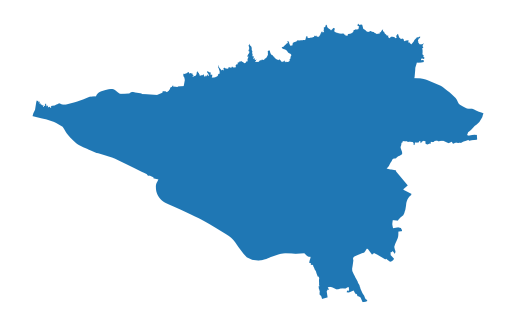

In [2]:
import osmnx as ox
city = ox.places = ox.geocode_to_gdf(['Tehran'])

ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

In [ ]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

In [ ]:
G = ox.graph_from_address('350 5th Ave, New York, New York', network_type='drive')
ox.plot_graph(G)

In [ ]:
# G = ox.graph_from_place('کرج - آزادگان', network_type='drive', simplify=True)
# ox.plot_graph(G)
G = ox.graph_from_address('کرج', dist=200, network_type='drive')
G = ox.get_undirected(G)

fig, ax = ox.plot_graph(G, bgcolor='black', edge_linewidth=3, node_size=0,
                        show=False, close=False)
for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
    c = edge['geometry'].centroid
    text = edge['name']
    ax.title.set_color('red')

    ax.annotate(file_handler.persian_fix(text), (c.x, c.y), c='red')
plt.show()

In [ ]:
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    edge_color="w",
    edge_linewidth=0.3,
    node_size=0,
)
gdf = ox.geocode_to_gdf("کرج")

# to this matplotlib axis, add the place shape(s)
gdf.plot(ax=ax, fc="k", ec="#666666", lw=1, alpha=1, zorder=-1)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

In [78]:
place = ["Tehran, Iran"]
cf = '["highway"~"trunk|motorway|primary"]'
# G = ox.graph_from_place(place, retain_all=True, simplify = True, network_type='all', custom_filter=cf)
G = ox.graph_from_bbox(bbox=(36.1290,35.1525,52.4501,50.2940), retain_all=True, simplify = True, network_type='all', custom_filter=cf)

# Prepare data
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True): # added ww
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)
    if ddata['osmid'] == 4480201:
        print(ddata)

{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 19.377}
{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 539.103, 'geometry': <LINESTRING (51.367 35.561, 51.368 35.564, 51.369 35.564, 51.369 35.566)>}
{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 17.774}


In [86]:
osmid_codes = {
    449543314: 114552,
    4480201:113203,
}

osmid_names = {
    'بزرگراه آزادگان': 114552,
    'آزادراه خلیج فارس':113203,
}

type(osmid_codes) == dict
len(set([1,3,4,444,4]).intersection(set([1,3])))
item = [4480201]
len(set(item).intersection(set(osmid_codes.keys()))) > 0

True

{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 19.377}
{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 539.103, 'geometry': <LINESTRING (51.367 35.561, 51.368 35.564, 51.369 35.564, 51.369 35.566)>}
{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 17.774}


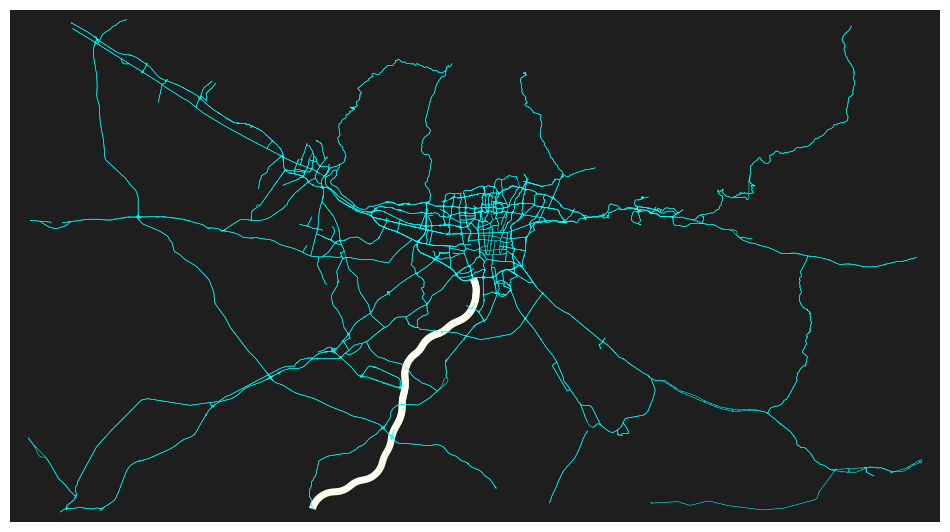

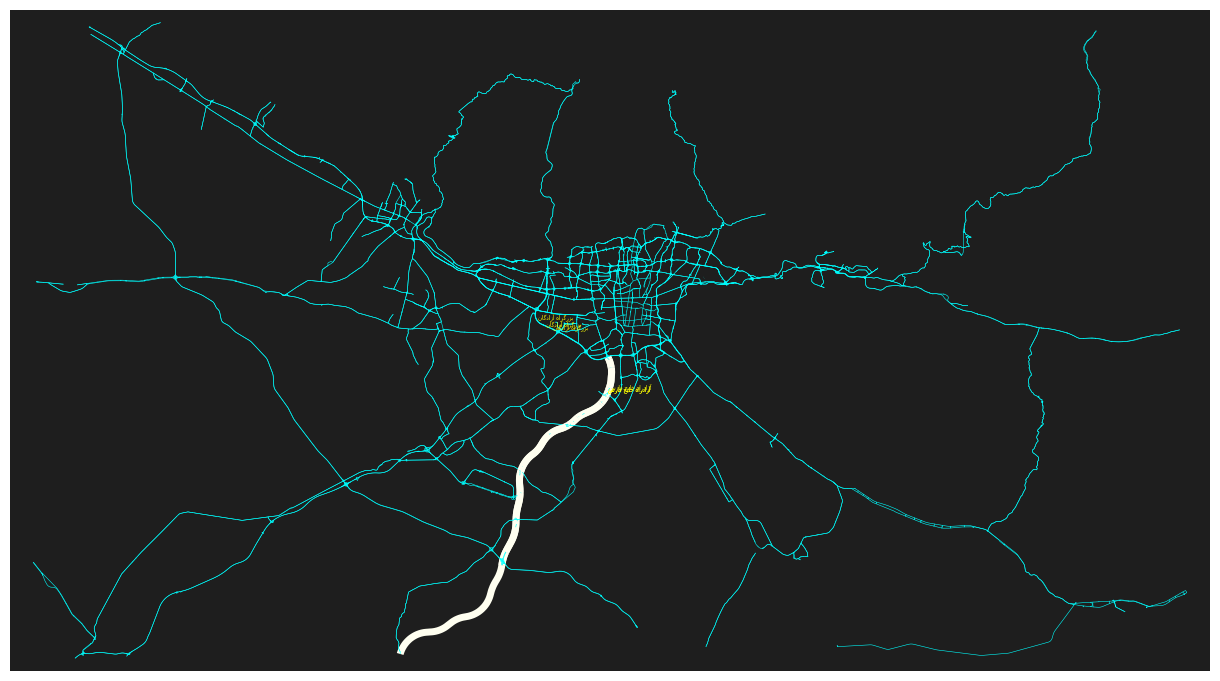

In [103]:
roadCols = []
edge_width = []

for item in data:
    mark = False

    if "osmid" in item.keys():
        # Check by code
        if type(item['osmid']) == list:
            if len( set(item['osmid']).intersection(set(osmid_codes.keys()))) >0:
                color = "#FFFFF0"
                edge = 5
                mark = True
        else:
            if item["osmid"] in list(osmid_codes.keys()):
                color = "#FFFFF0"
                edge = 5
                print(item)

                mark = True
        # check by names
    if ('name' in item.keys()):
        if type(item['name']) == str:
            if item["name"] in osmid_names.keys():
                color = "#FFFFF0"
                edge = 5
                # else:

                mark = True
            # elif 4480201 == item['osmid'] or ('name' in item and 'آزادراه خلیج فارس' in item['name']):
        #     color = "#FFFFF0"
        #     edge = 5
    if not mark:
        color = "#00FFFF"
        edge = 0.4

    roadCols.append(color)
    edge_width.append(edge)

# Plot
bgcolor = "#1e1e1e"
fig, ax = ox.plot_graph(G, node_size=0,
                        dpi=500, bgcolor=bgcolor,
                        save=False, edge_color=roadCols,
                        edge_linewidth=edge_width, edge_alpha=1, figsize=(12, 12))

# fig, ax = ox.plot_graph(G, bgcolor='black', edge_linewidth=3, node_size=0,
#                         show=False, close=False)
e1 = None
for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
    if (edge['osmid'] == 449543314) or (4480201 == edge['osmid']):
        c = edge['geometry'].centroid
        text = edge['name']
        ax.title.set_size(14)
        e1 = edge
        ax.annotate(file_handler.persian_fix(text),
                    (c.x, c.y), c='yellow', size=4)

# fig.show()

fig.tight_layout(pad=0)
fig.savefig("heatmap.jpg", dpi=600, bbox_inches='tight', format="png",
            facecolor=fig.get_facecolor(), transparent=False)
fig

In [66]:
data

[{'osmid': 482731540,
  'oneway': True,
  'ref': '49',
  'name': 'جاده ساوه بویین زهرا',
  'highway': 'trunk',
  'maxspeed': '110',
  'reversed': False,
  'length': 1723.856,
  'geometry': <LINESTRING (50.357 35.24, 50.357 35.24, 50.356 35.241, 50.353 35.246, 50.35...>},
 {'osmid': [482731538, 482731540],
  'oneway': True,
  'ref': '49',
  'name': 'جاده ساوه بویین زهرا',
  'highway': 'trunk',
  'maxspeed': '110',
  'reversed': False,
  'length': 1721.855,
  'geometry': <LINESTRING (50.386 35.209, 50.385 35.21, 50.385 35.21, 50.384 35.211, 50.38...>},
 {'osmid': 317311200,
  'oneway': True,
  'lanes': '2',
  'ref': '65',
  'name': 'تهران - ساوه',
  'highway': 'trunk',
  'maxspeed': '95',
  'reversed': False,
  'length': 4882.806,
  'geometry': <LINESTRING (50.783 35.385, 50.782 35.385, 50.779 35.384, 50.778 35.384, 50....>},
 {'osmid': [732904882, 732904883, 317311205],
  'ref': '65',
  'name': 'تهران - ساوه',
  'highway': 'primary',
  'maxspeed': '95',
  'oneway': False,
  'reversed': 

In [ ]:
data_df.loc[ data_df['osmid'] == 449543314]

In [38]:
names

{'113201': '\u202bآزادراه قم - گرمسار\u202c',
 '113203': '\u202bتهران - قم (آزادراه)\u202c',
 '113204': '\u202bتهران - ساوه (ابتداي آزادراه)\u202c',
 '113205': '\u202bتهران - جاجرود\u202c',
 '113206': '\u202bتهران - پرديس (ابتداي آزادراه)\u202c',
 '113207': '\u202bتهران - \u200dپرديس (انتهاي آزادراه)\u202c',
 '113209': '\u202bتهران - پاکدشت\u202c',
 '113210': '\u202bعوارضي تهران - قم\u202c',
 '113211': '\u202bچرمشهر - حسن\u200cآباد \u202c',
 '113212': '\u202bامام زاده داوود - تهران\u202c',
 '113213': '\u202bتهران - لواسان (طلاييه)\u202c',
 '113214': '\u202bتهران - لواسان (سوهانک)\u202c',
 '113228': '\u202bآزادراه تهران - ساوه(پرند)\u202c',
 '113251': '\u202bآزادراه گرمسار - قم\u202c',
 '113253': '\u202bقم - تهران (آزادراه)\u202c',
 '113254': '\u202bساوه - تهران (ابتداي آزادراه)\u202c',
 '113255': '\u202bجاجرود - تهران\u202c',
 '113256': '\u202bپرديس - تهران (ابتداي آزادراه)\u202c',
 '113257': '\u202bپرديس - تهران (انتهاي آزادراه)\u202c',
 '113259': '\u202bپاکدشت - تهران\u202c',
 '11326